In [1]:
import numpy as np
import matplotlib.pyplot as plt

from DataFormat    import Detector
from plot_spectrum import plot_energy_spectrum, plot_time_spectrum
from calib_fit     import fit_peak, gaussian, build_parameter_string, save_parameters

import glob
import os

In [2]:
SOURCE_LIST = ("60Co", "137Cs", "22Na")
E_FILTER    = ([10, 5, 5], [500, 500, 500])

E_CS   = 661.7  # keV
E_NA_1 = 511.0  # keV
E_NA_2 = 1274.5 # keV
E_CO_1 = 1173.2 # keV
E_CO_2 = 1332.5 # keV

E_CO_SUM_12 = E_CO_1 + E_CO_2
E_CO_SUM_11 = E_CO_1 + E_CO_1
E_CO_SUM_22 = E_CO_2 + E_CO_2

In [3]:
LaBr3_B = Detector(name="labr_b", sources=SOURCE_LIST)


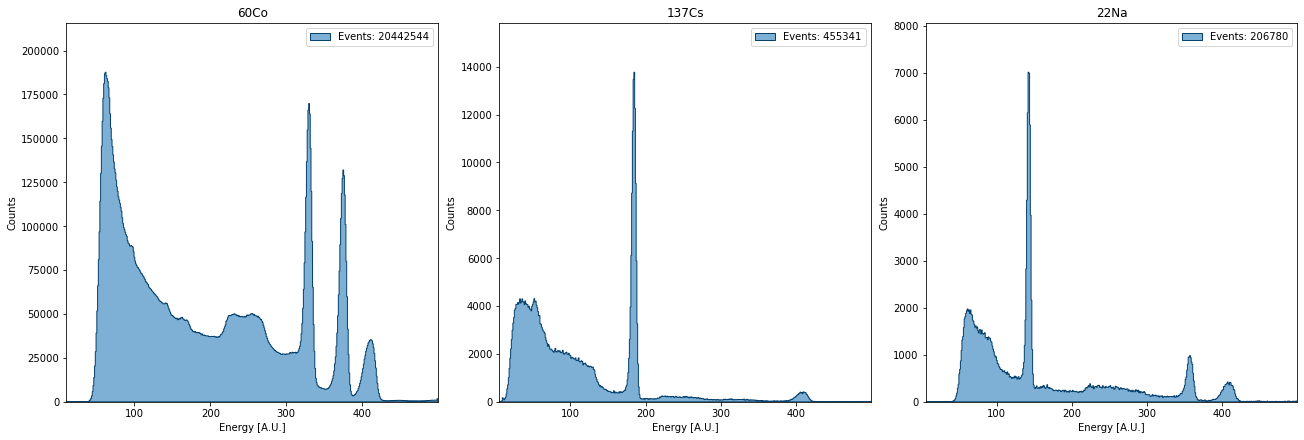

In [4]:
fig = plt.figure(figsize=(18, 6), constrained_layout=True)

for i, source in enumerate(SOURCE_LIST):
    x, y = LaBr3_B.get_energy_histogram(source)
    e_filter = (x > E_FILTER[0][i]) & (x < E_FILTER[1][i])
    ax = plot_energy_spectrum(
            x             = x, 
            y             = y, 
            energy_filter = e_filter,
            bins          = x[e_filter], 
            fig           = fig, 
            title         = f"{source}",
            xlabel        = "Energy [A.U.]",
            nrows         = 1, 
            ncols         = 3, 
            idx           = 1+i,
            label         = f"Events: {np.sum(y[e_filter]):.0f}"
        )
    ax.legend()
    
plt.show()

## Cesio

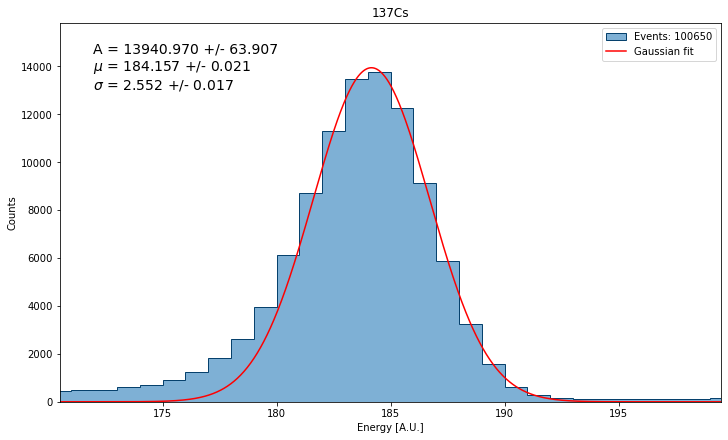

In [9]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[1]

x, y  = LaBr3_B.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 170
right = 200
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


e_fit  = (x > 182) & (x < 190)

par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 200, 5), e_fit=e_fit)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()


save_parameters(par, err, "labr_b_137Cs_662keV")


## Sodio

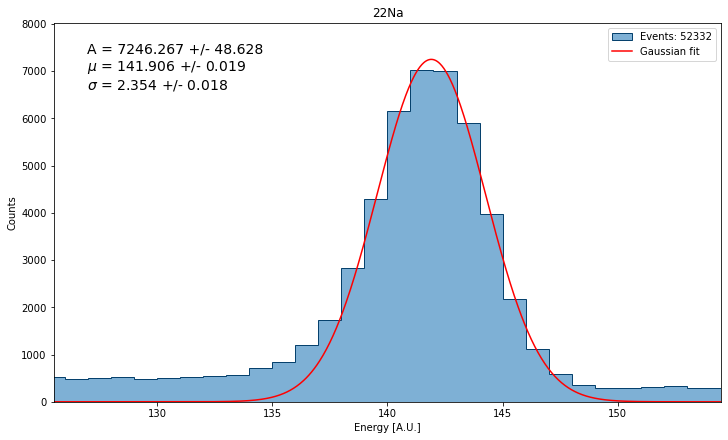

In [16]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[2]

x, y  = LaBr3_B.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 125
right = 155
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


e_fit  = (x > 139) & (x < 147)

par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 153, 5), e_fit=e_fit)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

ax.legend()

plt.show()

save_parameters(par, err, "labr_b_22Na_511keV")

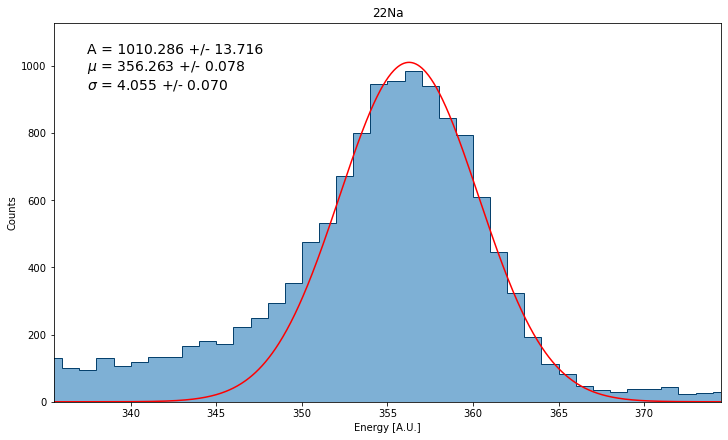

In [25]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[2]

x, y  = LaBr3_B.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 335
right = 375
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)


e_fit  = (x > 352) & (x < 365)
par, err = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 360, 5), e_fit=e_fit)

ax.plot(xgrid, gaussian(xgrid, *par), "r-", label="Gaussian fit")
par_string = build_parameter_string(par, err)

ax.text(0.05, 0.95, par_string, transform=ax.transAxes, fontsize=14, verticalalignment='top')

# ax.legend()

plt.show()

save_parameters(par, err, "labr_b_22Na_1274keV")

## Cobalto

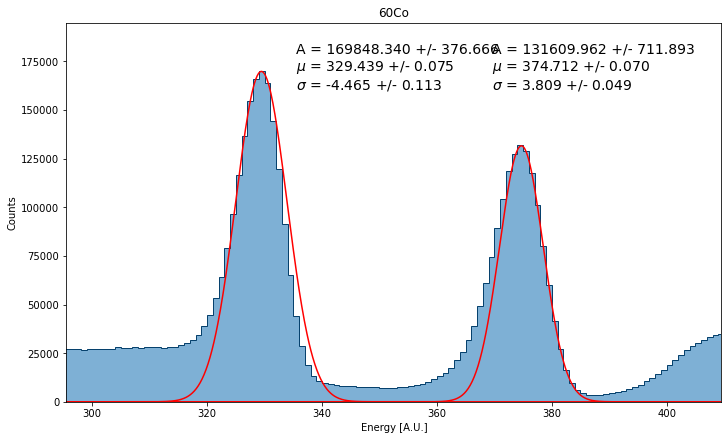

In [43]:
fig = plt.figure(figsize=(10,6), constrained_layout=True)  

source = SOURCE_LIST[0]

x, y  = LaBr3_B.get_energy_histogram(source)
y_err = np.sqrt(y)

# compute edges from bincenters x
binwidth = x[1] - x[0]
edges    = np.append(x - binwidth/2, x[-1] + binwidth/2)

left  = 295
right = 410
e_plot = (x > left) & (x < right)
e_bins = (edges > left - binwidth) & (edges < right + binwidth)


ax = plot_energy_spectrum(
    x             = x, 
    y             = y, 
    energy_filter = e_plot,
    bins          = edges[e_bins], 
    fig           = fig, 
    title         = f"{source}",
    xlabel        = "Energy [A.U.]",
    nrows         = 1, 
    ncols         = 1, 
    idx           = 1,
    label         = f"Events: {np.sum(y[e_plot]):.0f}"
)

e_fit_1  = (x > 326) & (x < 330)
e_fit_2  = (x > 375) & (x < 380)

xgrid = np.linspace(x[e_plot].min(), x[e_plot].max(), 1000)

par_1, err_1 = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 330, 5), e_fit=e_fit_1)
par_2, err_2 = fit_peak(x=x, y=y, err_y=y_err, func=gaussian, p0=(100, 390, 5), e_fit=e_fit_2)

ax.plot(xgrid, gaussian(xgrid, *par_1), "r-", label="Gaussian fit")
ax.plot(xgrid, gaussian(xgrid, *par_2), "r-", label="Gaussian fit")

par_string_1 = build_parameter_string(par_1, err_1)
par_string_2 = build_parameter_string(par_2, err_2)

ax.text(0.35, 0.95, par_string_1, transform=ax.transAxes, fontsize=14, verticalalignment='top')
ax.text(0.65, 0.95, par_string_2, transform=ax.transAxes, fontsize=14, verticalalignment='top')


plt.show()

save_parameters(par_1, err_1, "labr_b_60Co_1173keV")
save_parameters(par_2, err_2, "labr_b_60Co_1332keV")